In [4]:
%pip install matplotlib

  Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached numpy-2.2.4-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.1.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.3 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (322 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
Using cache

In [19]:
import sys
import time
import math
sys.path.append("../attachments/repo")

from lib.data.dataplot import *
from lib.utils.time import *
from lib.system.cart import *
from lib.system.basic import *
from lib.system.controllers import *

In [20]:
class System:
	def __init__(self):
		self.x1 = 0
		self.x2 = 0
	
	def evaluate(self, delta_t, _input):
		new_x2 = (1 - 0.5 * delta_t) * self.x2 - 4 * self.x1 * delta_t + 3 * _input * delta_t
		self.x1 = self.x2 * delta_t + self.x1

		self.x2 = new_x2
		return self.x1

class CompleteSystem:
	def __init__(self, kp, ki, kd):
		self.pid = PID_Controller(kp, ki, kd)
		self.s = System()
		self.y = 0
	
	def evaluate(self, delta_t, _input):
		self.u = self.pid.evaluate(delta_t, _input - self.y)
		self.y = self.s.evaluate(delta_t, self.u)
		return self.y

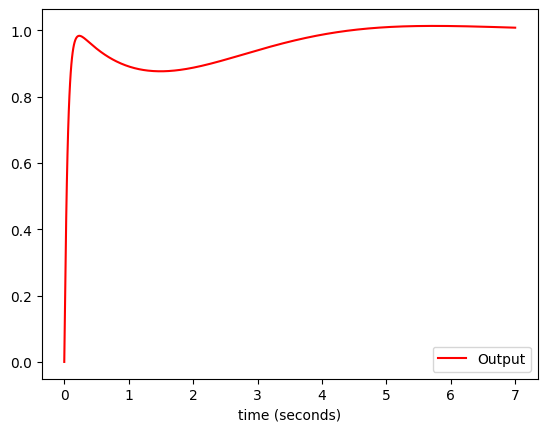

In [83]:
dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")

system = CompleteSystem(4, 4, 5)

position = 1

delta_t = 0.01
t = 0
while t < 7:
    
    p = system.evaluate(delta_t, position)
    
    dp.append_x(t)
    dp.append_y("out", p)

    t += delta_t

dp.plot()
